In [16]:
# run random forest classifier

# import various libraries
import numpy as np
import csv
import pandas as pd
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from pathlib import Path

# import data
#data = pd.read_csv("~/Desktop/ml_data/data_0404/improps/data_0413.csv", sep = ',', header = None)
#target = pd.read_csv("~/Desktop/ml_data/data_0404/improps/target_0413.csv", sep = ',', header = None)

#X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=0)
X_train = pd.read_csv("~/Desktop/ml_data/data_0404/improps/train_0407_2.csv", sep = ',', header = None)
y_train = pd.read_csv("~/Desktop/ml_data/data_0404/improps/train_id_0407_2.csv", sep = ',', header = None)
X_test = pd.read_csv("~/Desktop/ml_data/data_0404/improps/test_0407_2.csv", sep = ',', header = None)
y_test = pd.read_csv("~/Desktop/ml_data/data_0404/improps/test_id_0407_2.csv", sep = ',', header = None)

y_train = np.ravel(y_train, order = "C") # have to do this to make data the right shape

# random forest
model = RandomForestClassifier(n_estimators=500, max_features=0.6, min_samples_leaf=4)
model.fit(X_train, y_train)
#y_pred = model.predict(X_test)
#y_pred_prob = model.predict_proba(X_test)
#print(y_pred_prob)

RandomForestClassifier(max_features=0.6, min_samples_leaf=4, n_estimators=500)

In [17]:
# export results
y_pred = model.predict(X_test)
to_export = pd.DataFrame()
to_export['Pred'] = y_pred
to_export['True'] = y_test
#print(to_export)
to_export.to_csv("~/Desktop/ml_data/data_0404/improps/results_0415.csv")

In [18]:
rf_metrics = metrics.classification_report(y_pred, y_test)
print(rf_metrics)
#filename = Path('~/Desktop/ml_data/data_0404/improps/metrics_0413.txt')
#filename.touch(exist_ok=True)  # will create file, if it exists will do nothing
#metrics_file = open(filename, 'w')
#metrics_file = open(r'~/Desktop/ml_data/data_0404/improps/metrics_0413.txt', 'x')
#metrics_file.write(rf_metrics)
#metrics_file.close()

              precision    recall  f1-score   support

           0       0.77      0.75      0.76       154
           1       0.75      0.77      0.76       146

    accuracy                           0.76       300
   macro avg       0.76      0.76      0.76       300
weighted avg       0.76      0.76      0.76       300



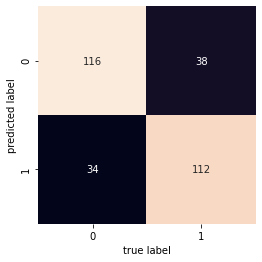

In [19]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

Cross Validation:
max_features: change the fraction of features considered at each split
n_estimators: change the number of trees: generally this should be maximized, but can stop increasing once bag error rate levels out

Automatically created module for IPython interactive environment


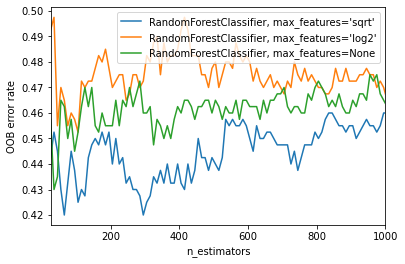

In [3]:
# thanks for the code Internet
import matplotlib.pyplot as plt
from collections import OrderedDict
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import csv
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from pathlib import Path

# Author: Kian Ho <hui.kian.ho@gmail.com>
#         Gilles Louppe <g.louppe@gmail.com>
#         Andreas Mueller <amueller@ais.uni-bonn.de>
#
# License: BSD 3 Clause

print(__doc__)

X = pd.read_csv("~/Desktop/ml_data/data_0527/train_0528_rf.csv", sep = ',', header = None)
y = pd.read_csv("~/Desktop/ml_data/data_0527/train_id_0528_rf.csv", sep = ',', header = None)
y = np.ravel(y, order = "C") # have to do this to make data the right shape


# NOTE: Setting the `warm_start` construction parameter to `True` disables
# support for parallelized ensembles but is necessary for tracking the OOB
# error trajectory during training.
ensemble_clfs = [
    ("RandomForestClassifier, max_features='sqrt'",
        RandomForestClassifier(warm_start=True, oob_score=True,
                               max_features="sqrt")),
    ("RandomForestClassifier, max_features='log2'",
        RandomForestClassifier(warm_start=True, max_features='log2',
                               oob_score=True)),
    ("RandomForestClassifier, max_features=None",
        RandomForestClassifier(warm_start=True, max_features=None,
                               oob_score=True))
]

# Map a classifier name to a list of (<n_estimators>, <error rate>) pairs.
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

# Range of `n_estimators` values to explore.
min_estimators = 25
max_estimators = 1000
range_est = np.arange(min_estimators, max_estimators + 10, 10)
for label, clf in ensemble_clfs:
    for i in range_est:
        clf.set_params(n_estimators=i)
        clf.fit(X, y)

        # Record the OOB error for each `n_estimators=i` setting.
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

# Generate the "OOB error rate" vs. "n_estimators" plot.
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()

In [15]:
import numpy as np
import csv
import pandas as pd
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from pathlib import Path

# import data
#data = pd.read_csv("~/Desktop/ml_data/data_0404/improps/data_0413.csv", sep = ',', header = None)
#target = pd.read_csv("~/Desktop/ml_data/data_0404/improps/target_0413.csv", sep = ',', header = None)

#X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=0)
X_train = pd.read_csv("~/Desktop/ml_data/data_0528/train_0528_rf.csv", sep = ',', header = None)
y_train = pd.read_csv("~/Desktop/ml_data/data_0528/train_id_0528_rf.csv", sep = ',', header = None)
X_test = pd.read_csv("~/Desktop/ml_data/data_0528/test_0528_rf.csv", sep = ',', header = None)
y_test = pd.read_csv("~/Desktop/ml_data/data_0528/test_id_0528_rf.csv", sep = ',', header = None)

y_train = np.ravel(y_train, order = "C") # have to do this to make data the right shape

model = RandomForestClassifier()

param_grid = {'max_features': np.arange(0.1, 1, 0.1), 'n_estimators': np.arange(400, 1000, 50), 'min_samples_leaf': [1, 2, 3, 4, 5, 10, 50]}
grid = GridSearchCV(model, param_grid)
grid.fit(X_train, y_train)
print(grid.best_params_)

{'max_features': 0.6, 'min_samples_leaf': 4, 'n_estimators': 500}
